In [2]:
#!/usr/bin/env python
# coding: utf-8

import sys
sys.path.append('mnt/sw/nix/store/i4qqrrhx6cjsr6r2vl06h9fwbzc9qs8p-texlive-20210325/bin/x86_64-linux/')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('~/matplotlib.mplstyle')

from astropy import units as u
#import pynbody
#import healpy as hp
#from healpy.newvisufunc import projview, newprojplot

sys.path.append("../scripts/src/")

sys.path.append("/mnt/home/ecunninagham/python")
#import nba

#import io_gizmo_pynbody as ga
#import halo_analysis as halo

# 
#import pynbody_routines as pr 
#import io_gizmo_pynbody as fa
#import plotting as pl

from scipy.linalg import norm
import h5py
import itertools
from numpy import linalg as la

In [3]:
"""

def host_velocities(sim):
    center_coordinates = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/track/host_coordinates.hdf5".format(sim)
    f = h5py.File(center_coordinates, 'r')
    vel = np.sqrt(np.sum(f['host.velocity'][1:,0]**2, axis=1))
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    return times[1:], vel, f['host.velocity'][1:,:]
    
"""

'\n\ndef host_velocities(sim):\n    center_coordinates = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/track/host_coordinates.hdf5".format(sim)\n    f = h5py.File(center_coordinates, \'r\')\n    vel = np.sqrt(np.sum(f[\'host.velocity\'][1:,0]**2, axis=1))\n    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)\n    times = np.loadtxt(snap_times, usecols=3)\n    return times[1:], vel, f[\'host.velocity\'][1:,:]\n    \n'

In [4]:
"""
def sim_angmom(sim, snap, rmin, rmax):
    #sim='m12b'
    sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim)
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    m12i = fa.FIRE(sim, remove_satellite=True)
    sub_not_sat = m12i.subhalos(snap)
    d = np.sqrt(np.sum(sub_not_sat.dark['pos']**2, axis=1))
    mcut = np.where((np.log10(sub_not_sat.dark['mass']) > 7) & (d<rmax) & (d>rmin))
    #print('Mass', np.max((np.log10(sub_not_sat.dark['mass']))), len(mcut[0]))
    halo_kin = nba.kinematics.Kinematics(sub_not_sat.dark['pos'][mcut], sub_not_sat.dark['vel'][mcut])
    L  = halo_kin.part_angular_momentum()[:3]
    pos_r = L / norm(L, axis=0)
    x = np.where(np.abs(pos_r[0]) >= 0)
    Nsats = len(x[0])
    #print("Nsats=", len(x[0]))
    #x = np.isnan(pos_r[0])
    pos_rx = np.zeros((3, Nsats))
    pos_rx[0] = pos_r[0][x]
    pos_rx[1] = pos_r[1][x]
    pos_rx[2] = pos_r[2][x]
    lob, bop = halo_kin.orbpole()
    return pos_rx, lob, bop
    
"""

'\ndef sim_angmom(sim, snap, rmin, rmax):\n    #sim=\'m12b\'\n    sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim)\n    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)\n    times = np.loadtxt(snap_times, usecols=3)\n    m12i = fa.FIRE(sim, remove_satellite=True)\n    sub_not_sat = m12i.subhalos(snap)\n    d = np.sqrt(np.sum(sub_not_sat.dark[\'pos\']**2, axis=1))\n    mcut = np.where((np.log10(sub_not_sat.dark[\'mass\']) > 7) & (d<rmax) & (d>rmin))\n    #print(\'Mass\', np.max((np.log10(sub_not_sat.dark[\'mass\']))), len(mcut[0]))\n    halo_kin = nba.kinematics.Kinematics(sub_not_sat.dark[\'pos\'][mcut], sub_not_sat.dark[\'vel\'][mcut])\n    L  = halo_kin.part_angular_momentum()[:3]\n    pos_r = L / norm(L, axis=0)\n    x = np.where(np.abs(pos_r[0]) >= 0)\n    Nsats = len(x[0])\n    #print("Nsats=", len(x[0]))\n    #x = np.isnan(pos_r[0])\n    pos_rx = np.zeros((3, Nsats))\n    pos_rx[0] = pos_r[0][x]\n 

In [5]:
def host_times(sim):
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    return times[:] 

In [6]:
m12b_t = host_times('m12b')
m12i_t = host_times('m12i')


In [7]:
l_mean = []
b_mean = []
l_median = []
b_median = []

for i in range(20, 200, 10):
    mwlmc6 = np.loadtxt('../data/OP_statistics_MWLMC6_20_300_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    l_mean.append(mwlmc6[:,0])
    b_mean.append(mwlmc6[:,1])
    
    l_median.append(mwlmc6[:,2])
    b_median.append(mwlmc6[:,3])

(-1.0, 1.0)

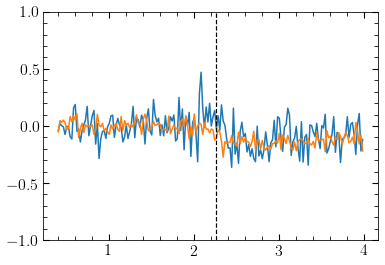

In [8]:
plt.plot(np.arange(0.4, 4, 0.02), np.array(l_mean).flatten()-180)
plt.plot(np.arange(0.4, 4, 0.02), np.array(b_mean).flatten())
plt.axvline(113*0.02, c='k', ls='--', lw=1.2)
plt.ylim(-1, 1)

### 

In [9]:
# Load data

In [98]:
hf_m12b = h5py.File('../scripts/m12b_rotated_subhalo_cat.h5py', 'r')
hf_m12c = h5py.File('../scripts/m12c_rotated_subhalo_cat.h5py', 'r')
hf_m12f = h5py.File('../scripts/m12f_rotated_subhalo_cat.h5py', 'r')
hf_m12w = h5py.File('../scripts/m12w_rotated_subhalo_cat.h5py', 'r')

In [99]:
hf_m12b_all = h5py.File('../scripts/m12b_all_rotated_subhalo_cat.h5py', 'r')
hf_m12c_all = h5py.File('../scripts/m12c_all_rotated_subhalo_cat.h5py', 'r')
hf_m12f_all = h5py.File('../scripts/m12f_all_rotated_subhalo_cat.h5py', 'r')
hf_m12w_all = h5py.File('../scripts/m12w_all_rotated_subhalo_cat.h5py', 'r')


In [12]:
hf_m12i = h5py.File('../scripts/m12i_rotated_subhalo_cat.h5py', 'r')

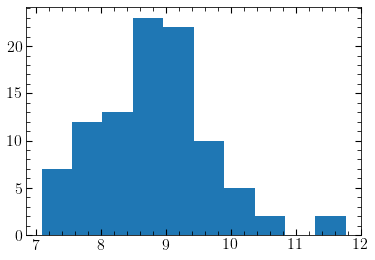

In [13]:
plt.hist(np.log10(hf_m12b['300']['stmass']));

In [131]:
Nsubs_m12i = np.zeros((300, 1))
Nsubs_m12b = np.zeros((300, 1))
Nsubs_m12c = np.zeros((300, 1))
Nsubs_m12f = np.zeros((300, 1))
Nsubs_m12w = np.zeros((300, 1))

Nsubs_m12i_sat = np.zeros(300)
Nsubs_m12b_sat = np.zeros(300)

Nsubs_m12b_all = np.zeros((300, 1))
Nsubs_m12c_all = np.zeros((300, 1))
Nsubs_m12f_all = np.zeros((300, 1))
Nsubs_m12w_all = np.zeros((300, 1))

for k in range(300, 600):
    mcuts = np.arange(6, 6.1, 0.5)
    j=0
    mcuti_sat = np.where(np.log10(hf_m12i['{}'.format(k)]['stmass'])>0)
    mcutb_sat = np.where(np.log10(hf_m12b['{}'.format(k)]['stmass'])>0)
    Nsubs_m12i_sat[k-300] = len(mcuti_sat[0])
    Nsubs_m12b_sat[k-300] = len(mcutb_sat[0])

    for m in mcuts:
        m12b_pos = hf_m12b['{}'.format(k)]['pos'][:]
        m12b_pos_all = hf_m12b_all['{}'.format(k)]['pos'][:]
        
        m12c_pos = hf_m12c['{}'.format(k)]['pos'][:]
        m12c_pos_all = hf_m12c_all['{}'.format(k)]['pos'][:]
        
        m12f_pos = hf_m12f['{}'.format(k)]['pos'][:]
        m12f_pos_all = hf_m12f_all['{}'.format(k)]['pos'][:]
        
        m12w_pos = hf_m12w['{}'.format(k)]['pos'][:]
        m12w_pos_all = hf_m12w_all['{}'.format(k)]['pos'][:]
        
        
        m12b_dist = np.sqrt(np.sum(m12b_pos**2, axis=1))
        m12b_dist_all = np.sqrt(np.sum(m12b_pos_all**2, axis=1))
        
        m12c_dist = np.sqrt(np.sum(m12c_pos**2, axis=1))
        m12c_dist_all = np.sqrt(np.sum(m12c_pos_all**2, axis=1))
        
        
        m12f_dist = np.sqrt(np.sum(m12f_pos**2, axis=1))
        m12f_dist_all = np.sqrt(np.sum(m12f_pos_all**2, axis=1))
        
        m12w_dist = np.sqrt(np.sum(m12w_pos**2, axis=1))
        m12w_dist_all = np.sqrt(np.sum(m12w_pos_all**2, axis=1))

        mcuti = np.where(np.log10(hf_m12i['{}'.format(k)]['darkmass'])>m)
        
        mcutb = np.where((np.log10(hf_m12b['{}'.format(k)]['darkmass'])>m) & (m12b_dist<50))
        mcutb_all = np.where((np.log10(hf_m12b_all['{}'.format(k)]['darkmass'])>m) & (m12b_dist_all<50))
        
        mcutc = np.where((np.log10(hf_m12c['{}'.format(k)]['darkmass'])>m) & (m12c_dist<50))
        mcutc_all = np.where((np.log10(hf_m12c_all['{}'.format(k)]['darkmass'])>m) & (m12c_dist_all<50))
        
        mcutf = np.where((np.log10(hf_m12f['{}'.format(k)]['darkmass'])>m) & (m12f_dist<50))
        mcutf_all = np.where((np.log10(hf_m12f_all['{}'.format(k)]['darkmass'])>m) & (m12f_dist_all<50))
        
        mcutw = np.where((np.log10(hf_m12w['{}'.format(k)]['darkmass'])>m) & (m12w_dist<50))
        mcutw_all = np.where((np.log10(hf_m12w_all['{}'.format(k)]['darkmass'])>m) & (m12w_dist_all<50))
        
        
        Nsubs_m12i[k-300, j] = len(mcuti[0])
        Nsubs_m12b[k-300, j] = len(mcutb[0])
        Nsubs_m12b_all[k-300, j] = len(mcutb_all[0])
        
        Nsubs_m12c[k-300, j] = len(mcutc[0])
        Nsubs_m12c_all[k-300, j] = len(mcutc_all[0])
        
        
        Nsubs_m12f[k-300, j] = len(mcutf[0])
        Nsubs_m12f_all[k-300, j] = len(mcutf_all[0])
        
        Nsubs_m12w[k-300, j] = len(mcutw[0])
        Nsubs_m12w_all[k-300, j] = len(mcutw_all[0])
        
        j+=1

(array([126., 298., 357., 224., 124., 183., 172., 150., 162., 198.]),
 array([  0.        ,  69.99587739, 139.99175477, 209.98763216,
        279.98350954, 349.97938693, 419.97526431, 489.9711417 ,
        559.96701908, 629.96289647, 699.95877386]),
 <BarContainer object of 10 artists>)

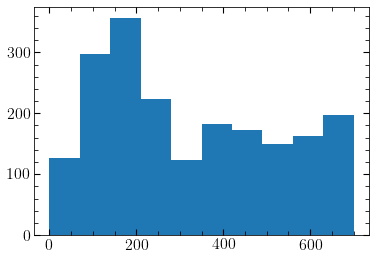

In [74]:
plt.hist(np.sqrt(np.sum(hf_m12b['300']['pos'][:]**2, axis=1)))

IndexError: index 1 is out of bounds for axis 1 with size 1

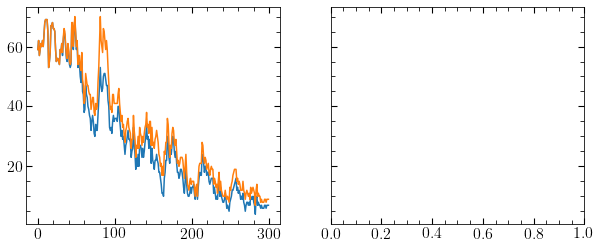

In [75]:
fig, ax = plt.subplots(1,2, figsize=(10, 4), sharey=True)
for i in range(5):
    ax[0].plot(Nsubs_m12b[:,i])
    ax[0].plot(Nsubs_m12b_all[:,i])
    #ax[1].semilogy(Nsubs_m12i[:,i])
    

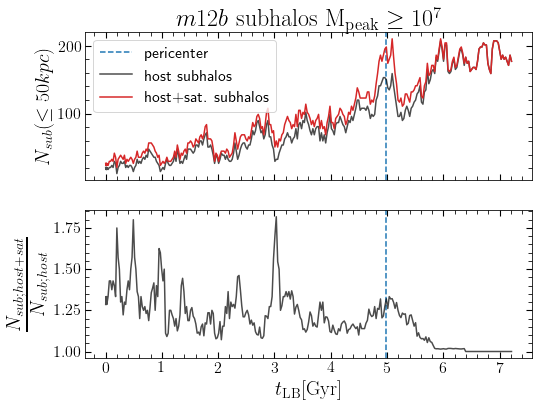

In [138]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax[0].axvline(m12b_t[-1]-m12b_t[385], ls='--', label='pericenter')
ax[0].plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12b[:,0], c='k', alpha=0.7,label='host subhalos')
ax[0].plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12b_all[:,0], c='C3', alpha=1,ls='-', label='host+sat. subhalos')
ax[0].legend(fontsize=16)
ax[0].set_title(r'$m12b\ \rm{subhalos\ M_{peak}} \geq 10^7$')


ax[1].axvline(m12b_t[-1]-m12b_t[385], ls='--', label='pericenter')
ax[1].plot(m12b_t[-1]-m12b_t[300:-1], Nsubs_m12b_all[:,0]/Nsubs_m12b[:,0], c='k', alpha=0.7,label='host subhalos')

plt.xlabel(r'$t\rm{_{LB}[Gyr]}$')
ax[0].set_ylabel(r'$N_{sub} (\leq 50 kpc)$')
ax[1].set_ylabel(r'$\frac{N_{sub; host+sat}}{N_{sub; host}}$', fontsize=28)

plt.savefig('m12b_subhalos_50kpc.png', bbox_inches='tight')
plt.savefig('m12b_subhalos_50kpc.pdf', bbox_inches='tight')

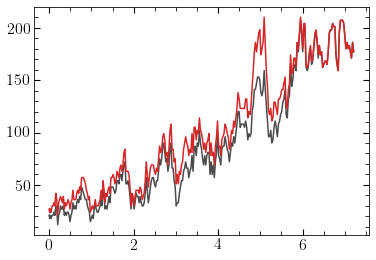

In [117]:
plt.plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12b[:,0], c='k', alpha=0.7,label='host subhalos')
plt.plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12b_all[:,0], c='C3', alpha=1,ls='-', label='host+sat. subhalos')


In [ ]:
plt.plot(m12b_t[-1]-m12b_t[300:-1], Nsubs_m12b_all[:,0]/Nsubs_m12b[:,0], c='k', alpha=0.7,label='host subhalos')


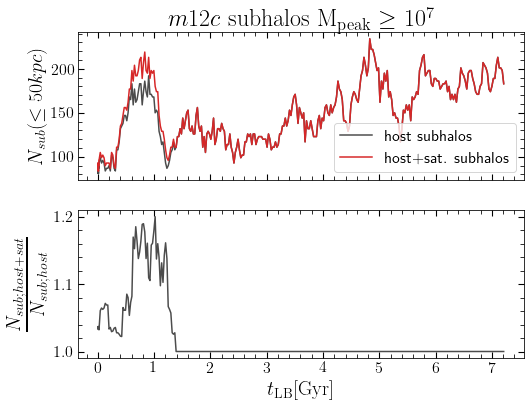

In [139]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
#ax[0].axvline(m12b_t[-1]-m12b_t[385], ls='--', label='pericenter')
ax[0].plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12c[:,0], c='k', alpha=0.7,label='host subhalos')
ax[0].plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12c_all[:,0], c='C3', alpha=1,ls='-', label='host+sat. subhalos')
ax[0].legend(fontsize=16)
ax[0].set_title(r'$m12c\ \rm{subhalos\ M_{peak}} \geq 10^7$')


#ax[1].axvline(m12b_t[-1]-m12b_t[385], ls='--', label='pericenter')
ax[1].plot(m12b_t[-1]-m12b_t[300:-1], Nsubs_m12c_all[:,0]/Nsubs_m12c[:,0], c='k', alpha=0.7,label='host subhalos')

plt.xlabel(r'$t\rm{_{LB}[Gyr]}$')
ax[0].set_ylabel(r'$N_{sub} (\leq 50 kpc)$')
ax[1].set_ylabel(r'$\frac{N_{sub; host+sat}}{N_{sub; host}}$', fontsize=28)

plt.savefig('m12c_subhalos_50kpc.png', bbox_inches='tight')
plt.savefig('m12c_subhalos_50kpc.pdf', bbox_inches='tight')

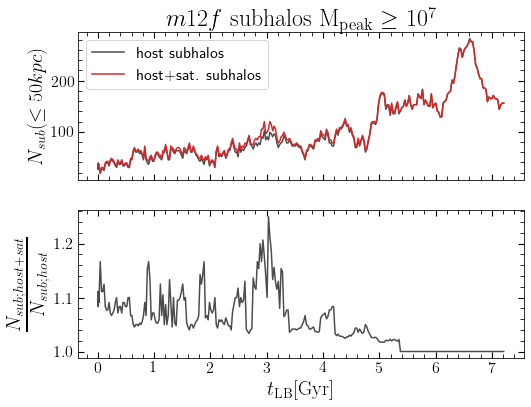

In [136]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
#ax[0].axvline(m12b_t[-1]-m12b_t[385], ls='--', label='pericenter')
ax[0].plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12f[:,0], c='k', alpha=0.7,label='host subhalos')
ax[0].plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12f_all[:,0], c='C3', alpha=1,ls='-', label='host+sat. subhalos')
ax[0].legend(fontsize=16)
ax[0].set_title(r'$m12f\ \rm{subhalos\ M_{peak}} \geq 10^7$')


#ax[1].axvline(m12b_t[-1]-m12b_t[385], ls='--', label='pericenter')
ax[1].plot(m12b_t[-1]-m12b_t[300:-1], Nsubs_m12f_all[:,0]/Nsubs_m12f[:,0], c='k', alpha=0.7,label='host subhalos')

plt.xlabel(r'$t\rm{_{LB}[Gyr]}$')
ax[0].set_ylabel(r'$N_{sub} (\leq 50 kpc)$')
ax[1].set_ylabel(r'$\frac{N_{sub; host+sat}}{N_{sub; host}}$', fontsize=28)

plt.savefig('m12f_subhalos_50kpc.png', bbox_inches='tight')
plt.savefig('m12f_subhalos_50kpc.pdf', bbox_inches='tight')

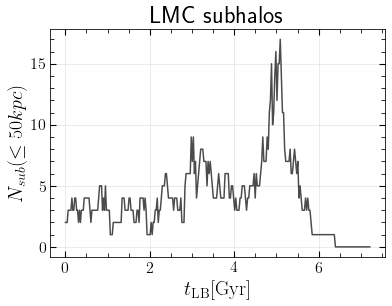

In [116]:
plt.plot(m12b_t[-1]-m12b_t[300:-1], Nsubs_m12b_all[:,0]-Nsubs_m12b[:,0], c='k', alpha=0.7,label='LMC subhalos')
plt.xlabel(r'$t\rm{_{LB}[Gyr]}$')
plt.ylabel(r'$N_{sub} (\leq 50 kpc)$')
plt.title('LMC subhalos')
plt.grid(alpha=0.3)
plt.savefig('LMC_satellites_leq1e7.pdf', bbox_inches='tight')

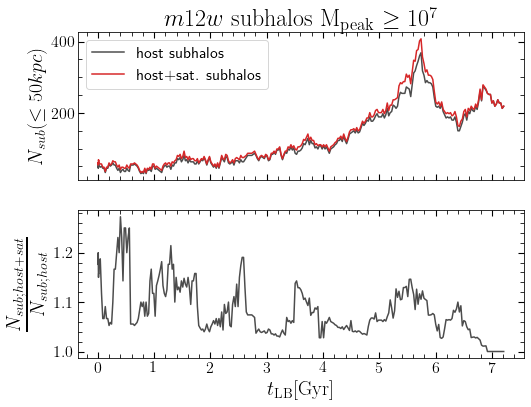

In [137]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
#ax[0].axvline(m12b_t[-1]-m12b_t[385], ls='--', label='pericenter')
ax[0].plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12w[:,0], c='k', alpha=0.7,label='host subhalos')
ax[0].plot(m12b_t[-1]-m12b_t[300:-1], 3*Nsubs_m12w_all[:,0], c='C3', alpha=1,ls='-', label='host+sat. subhalos')
ax[0].legend(fontsize=16)
ax[0].set_title(r'$m12w\ \rm{subhalos\ M_{peak}} \geq 10^7$')


#ax[1].axvline(m12b_t[-1]-m12b_t[385], ls='--', label='pericenter')
ax[1].plot(m12b_t[-1]-m12b_t[300:-1], Nsubs_m12w_all[:,0]/Nsubs_m12w[:,0], c='k', alpha=0.7,label='host subhalos')

plt.xlabel(r'$t\rm{_{LB}[Gyr]}$')
ax[0].set_ylabel(r'$N_{sub} (\leq 50 kpc)$')
ax[1].set_ylabel(r'$\frac{N_{sub; host+sat}}{N_{sub; host}}$', fontsize=28)

plt.savefig('m12w_subhalos_50kpc.png', bbox_inches='tight')
plt.savefig('m12w_subhalos_50kpc.pdf', bbox_inches='tight')

In [16]:
pos = hf_m12b['300']['pos'][:]

In [17]:
#adopted from jsamu/sappy/kinematics

def orbpole(pos, vel):
    # Hacked from Ekta's code
    # r x v in cartesian coordinates!
    uu = np.cross(pos, vel)
    # |r.v|
    uumag = la.norm(uu, axis=1)
    u = uu.T/uumag
    b = np.arcsin(u[2])
    sinl = u[1]/np.cos(b)
    cosl = u[0]/np.cos(b)
    ll = np.arctan2(sinl,cosl)

    gl = np.degrees(ll)
    gb = np.degrees(b)
    return gl, gb

def orbital_pole_dispersion(pos, vel):
    '''
    Calculate the angular dispersion [deg] of satellite orbital poles around
    their mean orbital pole.
    '''
    j_vec = np.cross(pos,vel)
    j_mag = norm(j_vec, axis=1)
    j_vec_norm = j_vec.T/j_mag
    #j_vec = orbital_ang_momentum(hal, hal_mask, host_str=host_str, norm=True)
    avg_j_vec = np.nanmean(j_vec_norm.T, axis=0, dtype=np.float64)/np.linalg.norm(np.nanmean(j_vec_norm.T, axis=0))
    #print(np.linalg.norm(np.nanmean(j_vec, axis=0)))
    avg_j_dot_j = np.array([np.dot(avg_j_vec, j_vec_i) for j_vec_i in j_vec_norm.T]) 
    pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))
    pole_disp = np.degrees(pole_disp)
    return pole_disp, avg_j_vec

In [18]:
def get_poles_means(catalogue, mmin=7, dlims=[50, 300]):
    #k = 300
    lop_mean = np.zeros(300)
    bop_mean = np.zeros(300)
    
    lop_mean_st = np.zeros(300)
    bop_mean_st = np.zeros(300)

    for k in range(300, 600):
        mcut = np.where(np.log10(catalogue['{}'.format(k)]['darkmass'])>mmin)

        pos = catalogue['{}'.format(k)]['pos'][:]
        dist = np.sqrt(np.sum(pos**2, axis=1))
        dcut = np.where((dist[mcut]>dlims[0]) & (dist[mcut]<dlims[1]))
        lop, bop = orbpole(catalogue['{}'.format(k)]['pos'], catalogue['{}'.format(k)]['vel'])
        lop_mean[k-300] = np.nanmean(lop[mcut][dcut])
        bop_mean[k-300] = np.nanmean(bop[mcut][dcut])
        
        msat = np.where(np.log10(catalogue['{}'.format(k)]['stmass'])>0)
        dcut_sat = np.where((dist[msat]>dlims[0]) & (dist[msat]<dlims[1]))
        #m12_kin_sat = nba.kinematics.Kinematics(catalogue['{}'.format(k)]['pos'], catalogue['{}'.format(k)]['vel'])
        #lop, bop = m12_kin.orbpole()
        lop_mean_st[k-300] = np.nanmean(lop[msat][dcut_sat])
        bop_mean_st[k-300] = np.nanmean(bop[msat][dcut_sat])
    return [lop_mean, bop_mean], [lop_mean_st, bop_mean_st]


def delta_k(pos_rx, k):
    npoints = np.shape(pos_rx)[1]
    #print(npoints)
    index = np.linspace(0, npoints-1, npoints)
    index_comb = np.array(list(itertools.combinations(index, k))).astype(int)
    #print(index_comb[0], len(index_comb), np.shape(index_comb))
    #print(np.shape(index_comb))
    x3 = np.zeros((len(index_comb), k))
    y3 = np.zeros((len(index_comb), k))
    z3 = np.zeros((len(index_comb), k))
    #print(index_comb[4])
    for i in range(len(x3)):
        #print(pos_rx.T[index_comb[i],0], x3[i], index_comb[i])
        #print(i, index_comb[i])
        x3[i] = pos_rx.T[index_comb[i],0]
        y3[i] = pos_rx.T[index_comb[i],1]
        z3[i] = pos_rx.T[index_comb[i],2]
    #print(x3[-1])
    #x3 = np.array(list(itertools.combinations(pos_rx.T[:,0], k)))
    #y3 = np.array(list(itertools.combinations(pos_rx.T[:,1], k)))
    #z3 = np.array(list(itertools.combinations(pos_rx.T[:,2], k)))
    #print(np.shape(x3), len(x3))
    #print(x3)
    delta_sph = np.zeros(len(x3))
    for n in range(len(x3)):
        x_mean = np.mean(x3[n])
        y_mean = np.mean(y3[n])
        z_mean = np.mean(z3[n])

        delta_sph_k = np.zeros(k)
        mean_vec = np.array([x_mean, y_mean, z_mean])/norm(np.array([x_mean, y_mean, z_mean]))
        for p in range(k):
            all_vec =  np.array([x3[n, p], y3[n, p], z3[n, p]])/norm(np.array([x3[n, p], y3[n, p], z3[n, p]]))
            delta_sph_k[p] = np.arccos((np.dot(mean_vec, all_vec)))*180/np.pi
            #print(delta_sph_k)
        delta_sph[n] = np.sqrt(np.sum(delta_sph_k**2, axis=0)/k)
    return np.min(delta_sph)

In [56]:
def get_poles_disp(catalogue, mmin=7, dlims=[50, 300]):
    #k = 300
    op_disp = np.zeros(300)
    op_disp_sat = np.zeros(300)
    
    
    for k in range(300, 600):
        mcut = np.where(np.log10(catalogue['{}'.format(k)]['darkmass'])>mmin)
        pos = catalogue['{}'.format(k)]['pos'][:]
        dist = np.sqrt(np.sum(pos**2, axis=1))
        dcut = np.where((dist[mcut]>dlims[0]) & (dist[mcut]<dlims[1]))
        pos_cut = catalogue['{}'.format(k)]['pos'][mcut][dcut][:]
        vel_cut = catalogue['{}'.format(k)]['vel'][mcut][dcut][:]
        m12_kin, _ = orbital_pole_dispersion(pos_cut, vel_cut)
        op_disp[k-300] = m12_kin
        
        
        msat = np.where(np.log10(catalogue['{}'.format(k)]['stmass'])>0)
        dcut_sat = np.where((dist[msat]>dlims[0]) & (dist[msat]<dlims[1]))
        pos_cut = catalogue['{}'.format(k)]['pos'][msat][dcut_sat][:]
        vel_cut = catalogue['{}'.format(k)]['vel'][msat][dcut_sat][:]
        m12_sat, _ = orbital_pole_dispersion(pos_cut, vel_cut)
        op_disp_sat[k-300] = m12_sat
        
    return op_disp, op_disp_sat

In [57]:
out_m12b, out_m12b_sat  = get_poles_means(hf_m12b, dlims=[50, 400])
in_m12b, in_m12b_sat = get_poles_means(hf_m12b, dlims=[0, 50])

in_m12b_all, in_m12b_all_sat = get_poles_means(hf_m12b_all, dlims=[0, 50])
out_m12b_all, out_m12b_all_sat = get_poles_means(hf_m12b_all, dlims=[50, 400])

out_m12i, out_m12i_sat = get_poles_means(hf_m12i, dlims=[50, 400])
in_m12i, in_m12i_sat = get_poles_means(hf_m12i, dlims=[0, 50])

/tmp/ipykernel_4028/722929800.py:9: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag
/tmp/ipykernel_4028/2506944195.py:23: RuntimeWarning: Mean of empty slice
  lop_mean_st[k-300] = np.nanmean(lop[msat][dcut_sat])
/tmp/ipykernel_4028/2506944195.py:24: RuntimeWarning: Mean of empty slice
  bop_mean_st[k-300] = np.nanmean(bop[msat][dcut_sat])


In [85]:
mmin = 8
out_m12b_d, out_m12b_d_sat = get_poles_disp(hf_m12b, mmin=mmin, dlims=[50, 400])
in_m12b_d, in_m12b_d_sat = get_poles_disp(hf_m12b, dlims=[0, 50], mmin=mmin)

in_m12b_all_d, in_m12b_all_d_sat = get_poles_disp(hf_m12b_all, dlims=[0, 50], mmin=mmin)
out_m12b_all_d, out_m12b_all_d_sat = get_poles_disp(hf_m12b_all, mmin=mmin, dlims=[50, 400])

out_m12i_d, out_m12i_d_sat = get_poles_disp(hf_m12i, dlims=[50, 400], mmin=mmin)
in_m12i_d, in_m12i_d_sat = get_poles_disp(hf_m12i, dlims=[0, 50], mmin=mmin)

/tmp/ipykernel_4028/722929800.py:28: RuntimeWarning: Mean of empty slice
  avg_j_vec = np.nanmean(j_vec_norm.T, axis=0, dtype=np.float64)/np.linalg.norm(np.nanmean(j_vec_norm.T, axis=0))
/tmp/ipykernel_4028/722929800.py:31: RuntimeWarning: Mean of empty slice
  pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))
/tmp/ipykernel_4028/722929800.py:31: RuntimeWarning: invalid value encountered in arccos
  pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))


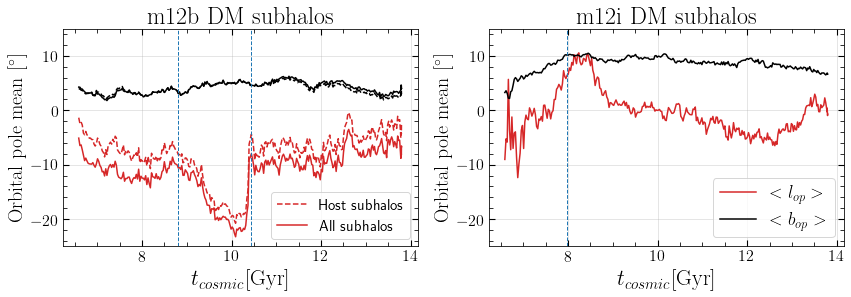

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharey=False)


#ax[0][0].plot(m12b_t[300:-1], in_m12b[0], c='C0', label=r'$<{l_{op}} >$')
#ax[0][0].plot(m12b_t[300:-1], in_m12b[1], c='k', label=r'$<{b_{op}} >$')

#ax[0][0].plot(m12b_t[300:-1], in_m12b_all[0], c='C0', ls='--')
#ax[0][0].plot(m12b_t[300:-1], in_m12b_all[1], c='k', ls='--')


ax[0].plot(m12b_t[300:-1], out_m12b[0], ls ='--', c='C3', label='Host subhalos')
ax[0].plot(m12b_t[300:-1], out_m12b[1], ls='--', c='k')


ax[0].plot(m12b_t[300:-1], out_m12b_all[0], c='C3', ls='-', label='All subhalos')
ax[0].plot(m12b_t[300:-1], out_m12b_all[1], c='k', ls='-')



#ax[0][1].plot(m12i_t[300:-1], in_m12i[0])
#ax[0][1].plot(m12i_t[300:-1], in_m12i[1], c='k')


ax[1].plot(m12i_t[300:-1], out_m12i[0], label=r'$<{l_{op}} >$', c='C3')
ax[1].plot(m12i_t[300:-1], out_m12i[1], c='k', label=r'$<{b_{op}} >$')


#ax[2].plot(np.arange(0.4, 4, 0.02), np.array(l_mean).flatten()-180)
#ax[2].plot(np.arange(0.4, 4, 0.02), 100*np.array(b_mean).flatten())
#ax[2].axvline(113*0.02, c='k', ls='--', lw=1.2)

ax[0].legend(fontsize=15)
ax[1].legend(fontsize=18)
ax[0].axvline(m12b_t[385], ls='--', lw=1)
ax[0].axvline(m12b_t[449], ls='--', lw=1)

ax[1].axvline(m12i_t[353], ls='--', lw=1)


#ax[1].axvline(m12b_t[385], ls='--')
#ax[1].axvline(m12b_t[449], ls='--')

ax[0].grid(alpha=0.4)
ax[1].grid(alpha=0.4)
ax[0].set_ylim(-25, 15)
ax[1].set_ylim(-25, 15)

#ax[1][0].grid(alpha=0.4)
#ax[1][1].grid(alpha=0.4)


ax[0].set_title(r'$\rm{m12b\ DM\ subhalos}$')
ax[1].set_title(r'$\rm{m12i\ DM\ subhalos}$')

ax[0].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[1].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[0].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')
ax[1].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')

plt.savefig('op_mean_outter.pdf', bbox_inches='tight')
plt.savefig('op_mean_outter.png', bbox_inches='tight')

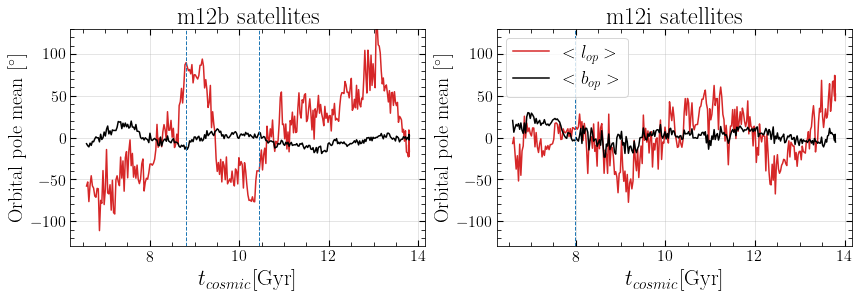

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharey=False)


#ax[0].plot(m12b_t[300:-1], out_m12b_sat[0], c='C3', ls='--')
#ax[0].plot(m12b_t[300:-1], out_m12b_sat[1], c='k', ls='--')

ax[0].plot(m12b_t[300:-1], out_m12b_all_sat[0], c='C3', ls='-')
ax[0].plot(m12b_t[300:-1], out_m12b_all_sat[1], c='k', ls='-')

ax[1].plot(m12b_t[300:-1], out_m12i_sat[0], c='C3', ls='-', label=r'$<{l_{op}} >$')
ax[1].plot(m12b_t[300:-1], out_m12i_sat[1], c='k', ls='-', label=r'$<{b_{op}} >$')



ax[0].axvline(m12b_t[385], ls='--', lw=1)
ax[0].axvline(m12b_t[449], ls='--', lw=1)
ax[1].axvline(m12b_t[353], ls='--', lw=1)

ax[0].grid(alpha=0.4)
ax[1].grid(alpha=0.4)

ax[1].legend(fontsize=18)

ax[0].set_title(r'$\rm{m12b\ satellites}$')
ax[1].set_title(r'$\rm{m12i\ satellites}$')

ax[0].set_ylim(-130, 130)
ax[1].set_ylim(-130, 130)

ax[0].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[1].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[0].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')
ax[1].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')


plt.savefig('op_mean_outter_sat.pdf', bbox_inches='tight')
plt.savefig('op_mean_outter_sat.png', bbox_inches='tight')

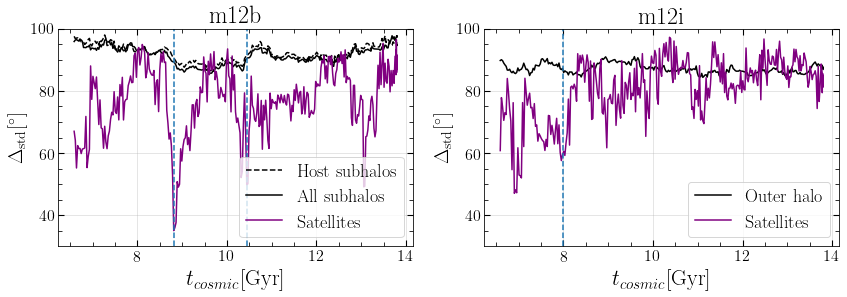

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharex=True, sharey=False)


#ax[0].plot(m12b_t[300:-1], in_m12b_d, c='k', alpha=0.3)
#ax[0].plot(m12b_t[300:-1], in_m12b_all_d, c='k', ls='--', alpha=0.3)


ax[0].plot(m12b_t[300:-1], out_m12b_d, c='k', label=r'$\rm{Host\ subhalos}$', ls='--')
ax[0].plot(m12b_t[300:-1], out_m12b_all_d, c='k', ls='-', label=r'$\rm{All\ subhalos}$')

#ax[0].plot(m12b_t[300:-1], in_m12b_d_sat, c='C3', ls='--')
ax[0].plot(m12b_t[300:-1], out_m12b_all_d_sat, c='purple', ls='-', label=r'$\rm{Satellites}$')


#ax[1].plot(m12i_t[300:-1], in_m12i_d, c='k', alpha=0.3, label=r'$\rm{Inner\ halo}$')
ax[1].plot(m12i_t[300:-1], out_m12i_d, c='k', label=r'$\rm{Outer\ halo}$')
ax[1].plot(m12i_t[300:-1], out_m12i_d_sat, c='purple', label=r'$\rm{Satellites}$')


#ax[0].legend(fontsize=18)
ax[0].axvline(m12b_t[385], ls='--', c='C0')
ax[0].axvline(m12b_t[449], ls='--', c='C0')
ax[1].axvline(m12i_t[353], ls='--', c='C0')

#ax[0].axvline(85)
#ax[0].axvline(149)

ax[0].set_title('m12b')
ax[1].set_title('m12i')

ax[0].grid(alpha=0.4)
ax[1].grid(alpha=0.4)

ax[1].legend(fontsize=18)
ax[0].legend(fontsize=18)
ax[0].set_ylim(30, 100)
ax[1].set_ylim(30, 100)

ax[0].set_title(r'$\rm{m12b}$')
ax[1].set_title(r'$\rm{m12i}$')

ax[0].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[1].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[0].set_ylabel(r'$\rm{\Delta_{std} [^{\circ}]}$')
ax[1].set_ylabel(r'$\rm{\Delta_{std} [^{\circ}]}$')

plt.savefig('op_disp_m12b_m12i.pdf', bbox_inches='tight')
plt.savefig('op_disp_m12b_m12i.png', bbox_inches='tight')

In [74]:
in_m12b_all_d_sat

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

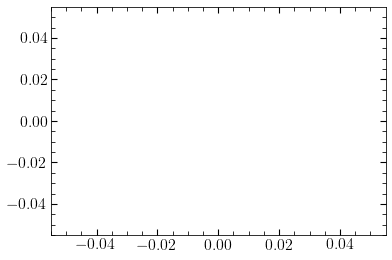

In [73]:
plt.plot(m12b_t[300:-1], in_m12b_d_sat, c='C3', ls='--')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$\\rm{\\Delta_{sph} [^{\\circ}]}$')

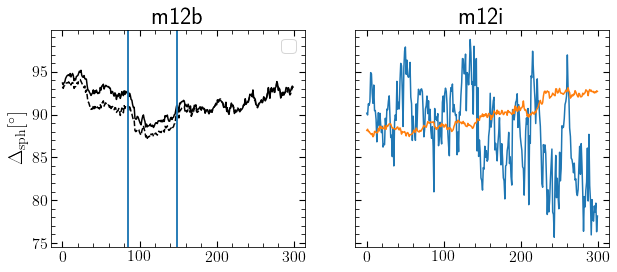

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
#ax[0].plot(in_m12b_d, c='C0', label=r'$<{l_{op}} >$')

#ax[0].plot(in_m12b_all_d, c='C0', ls='--')



ax[0].plot(m12out_m12b_d, c='k', label='subhalos')

ax[0].plot(out_m12b_all_d, c='k', ls='--',label='subhalos')


ax[1].plot(in_m12i_d)
ax[1].plot(out_m12i_d)


ax[0].legend(fontsize=18)
ax[0].axvline(85)
ax[0].axvline(149)

ax[0].axvline(85)
ax[0].axvline(149)

ax[0].set_title('m12b')
ax[1].set_title('m12i')


ax[0].set_ylabel(r'$\rm{\Delta_{sph} [^{\circ}]}$')



In [67]:
pos_dm1 = hf['300']['darkmass']


NameError: name 'hf' is not defined

In [ ]:
plt.scatter(pos_dm1[0,0], pos_dm1[0,1], s=1)


In [ ]:
mass = pos_dm1

In [ ]:
plt.hist(np.log10(pos_dm1))